# "Homework 1"
## Malvika Viswanathan
## January 26, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import pyreadr
import pandas as pd
import rdata

In [2]:
path = 'ESL.mixture.rda'
data = rdata.parser.parse_file(path)

In [3]:
data = rdata.conversion.convert(data)
dat = data['ESL.mixture']

C:\Users\malvi\anaconda3\Lib\site-packages\rdata\conversion\_conversion.py:887: UserWarning: Missing constructor for R class "matrix". The underlying R object is returned instead.
  warnings.warn(


C:\Users\malvi\AppData\Local\Temp\ipykernel_42560\4123921659.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(dat['px1'], dat['px2'], prob, levels=[0.5], colors='purple', linewidths=2, label='True Boundary')


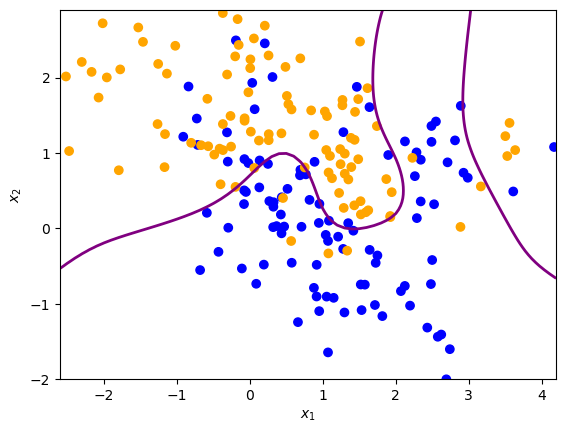

In [4]:
def plot_mix_data(dat, datboot=None):
    if datboot is not None:
        dat['x'] = datboot['x']
        dat['y'] = datboot['y']
    
    # Scatter plot for data points
    plt.scatter(dat['x'][:, 0], dat['x'][:, 1], c=np.where(dat['y'] == 0, 'blue', 'orange'), marker='o', label='Data')
    
    # Draw Bayes (True) classification boundary
    prob = np.array(dat['prob']).reshape(len(dat['px2']), len(dat['px1']))
    plt.contour(dat['px1'], dat['px2'], prob, levels=[0.5], colors='purple', linewidths=2, label='True Boundary')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()
    
plot_mix_data(dat)

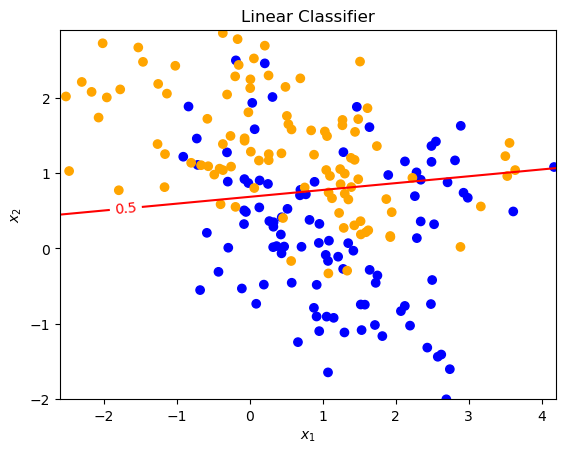

In [5]:
# Fit linear classifier
def fit_lc(y, x):
    x = np.column_stack((np.ones_like(y), x))
    beta = np.linalg.solve(x.T @ x, x.T @ y)
    return beta

# Make predictions from linear classifier
def predict_lc(x, beta):
    x = np.column_stack((np.ones_like(x[:, 0]), x))
    return x @ beta

# Fit model to mixture data and make predictions
lc_beta = fit_lc(dat['y'], dat['x'])
lc_pred = predict_lc(dat['xnew'], lc_beta)

# Reshape predictions as a matrix
lc_pred = lc_pred.reshape(len(dat['px2']), len(dat['px1']))

# Plot decision surface for linear classifier
plt.scatter(dat['x'][:, 0], dat['x'][:, 1], c=np.where(dat['y'] == 0, 'blue', 'orange'), marker='o',label='_nolegend_')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
contour = plt.contour(dat['px1'], dat['px2'], lc_pred, levels=[0.5], colors='red')
plt.clabel(contour)
plt.title("Linear Classifier")
plt.show()

## Rewriting fit_lc and predict_lc using LinearRegression from sklearn.linear_model

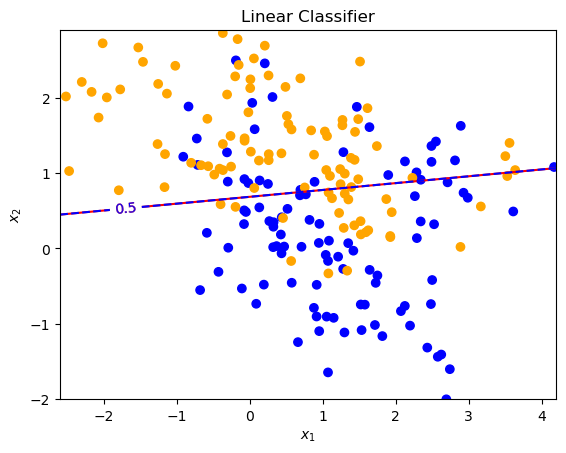

In [6]:
from sklearn.linear_model import LinearRegression
# fitting
lr = LinearRegression()
x = dat['x']
y = dat['y']
x = np.column_stack((np.ones_like(y), x))
lr.fit(x, y)

# prediction
x_new = dat['xnew']
x_new = np.column_stack((np.ones_like(x_new[:, 0]), x_new))
lc_pred_lm = lr.predict(x_new)


# Reshape predictions as a matrix
lc_pred_lm = lc_pred_lm.reshape(len(dat['px2']), len(dat['px1']))
plt.scatter(dat['x'][:, 0], dat['x'][:, 1], c=np.where(dat['y'] == 0, 'blue', 'orange'), marker='o')
contour1 = plt.contour(dat['px1'], dat['px2'], lc_pred, levels=[0.5], colors='red')
plt.clabel(contour1)
contour2 = plt.contour(dat['px1'], dat['px2'], lc_pred_lm, levels=[0.5], colors='blue', linestyles="dashed")
plt.clabel(contour2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Linear Classifier")
plt.legend
plt.show()

## Adding squared terms to make it more flexible

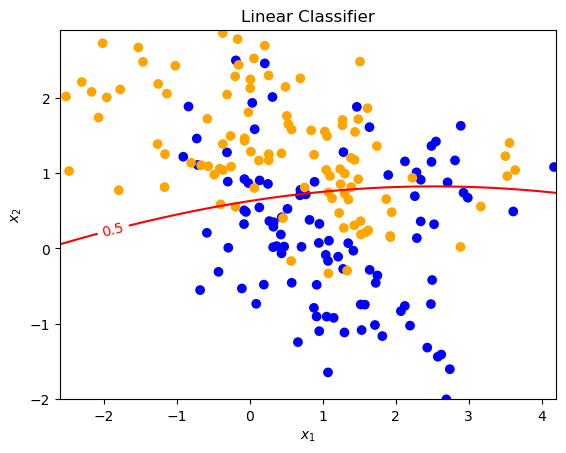

In [11]:
# Fit linear classifier
def fit_lc(y, x):
    x = np.column_stack((np.ones_like(y), x, x**2))
    beta = np.linalg.solve(x.T @ x, x.T @ y)
    return beta

# Make predictions from linear classifier
def predict_lc(x, beta):
    x = np.column_stack((np.ones_like(x[:, 0]), x,  x**2))
    return x @ beta

# Fit model to mixture data and make predictions
lc_beta = fit_lc(dat['y'], dat['x'])
lc_pred2 = predict_lc(dat['xnew'], lc_beta)

# Reshape predictions as a matrix
lc_pred2 = lc_pred2.reshape(len(dat['px2']), len(dat['px1']))

# Plot decision surface for linear classifier
lc_pred_lm = lc_pred_lm.reshape(len(dat['px2']), len(dat['px1']))
plt.scatter(dat['x'][:, 0], dat['x'][:, 1], c=np.where(dat['y'] == 0, 'blue', 'orange'), marker='o')
contour1 = plt.contour(dat['px1'], dat['px2'], lc_pred2, levels=[0.5], colors='red')
plt.clabel(contour1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Linear Classifier")
plt.legend
plt.show()

## Rewriting fit_lc and predict_lc using LinearRegression with squared terms

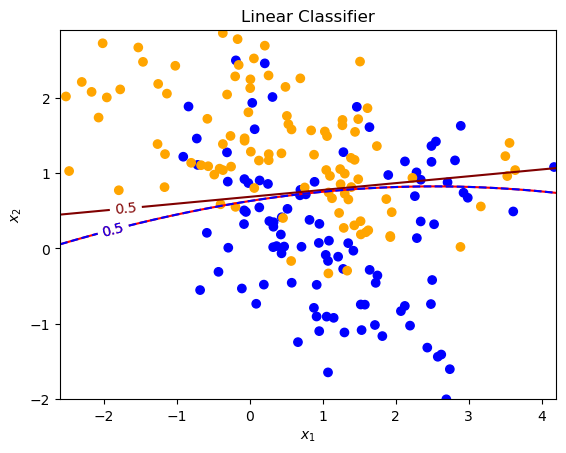

In [12]:
# fit
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = dat['x']
y = dat['y']
x = np.column_stack((np.ones_like(y), x, x**2))
lr.fit(x, y)

# prediction
x_new = dat['xnew']
x_new = np.column_stack((np.ones_like(x_new[:, 0]), x_new, x_new**2))
lc_pred_lm = lr.predict(x_new)


# Reshape predictions as a matrix
lc_pred_lm = lc_pred_lm.reshape(len(dat['px2']), len(dat['px1']))
plt.scatter(dat['x'][:, 0], dat['x'][:, 1], c=np.where(dat['y'] == 0, 'blue', 'orange'), marker='o')
contour = plt.contour(dat['px1'], dat['px2'], lc_pred, levels=[0.5], colors='maroon')
plt.clabel(contour)
contour1 = plt.contour(dat['px1'], dat['px2'], lc_pred2, levels=[0.5], colors='red')
plt.clabel(contour1)
contour2 = plt.contour(dat['px1'], dat['px2'], lc_pred_lm, levels=[0.5], colors='blue', linestyles="dashed")
plt.clabel(contour2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Linear Classifier")
plt.legend
plt.show()

By incorporating squared terms for x1 and x2 into our linear model, we observe an increase in variance. This is evident through changes in our prediction curve in response to variations in the x values. Models with greater flexibility, represented by curved boundaries, tend to exhibit higher variance as they are more sensitive to fluctuations in the training data.
By increasing flexibity and creating curved boundaries(blue and red dashed lines), the model can learn more patterns, thereby reducing bias in classification.
We can see how the linear model accurately classifies some of orange data points positioned between rigid(maroon line) and curved boundaries. Yet, there are instances where the model misses some blue data points, leading to misclassification.
Hence, we have created a curved boundary (blue and red dashed lines) that signifies improved flexibility because of adding squared terms to x1 and x2. This flexibility leads to more accurate classification of some data points, addressing bias, but the variance is increased. If we were to increase flexibility further, we would accurately classify on of the data points,leading to overfitting.